# Exothermic Continuous Stirred Tank Reactor
## Reaction Kinetics

### Step 1. Import library

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

### Step 2. Define parameters

In [3]:
# Arrehnius parameters
Ea = 72750 # activation energy J/gmol
R = 8.314 # gas constant J/gmol/K
k0 = 7.2e10 # Arrhenius rate constant 1/min

### Step 3. Arrhenius equation

In [4]:
# Arrhenius rate expression
def k(T):
    return k0*np.exp(-Ea/(R*T))

### Step 4. Set the initial Conditions, Time Grid,

In [5]:
# semilog plot of the rate constant
T = np.linspace(290, 400)

### Step 5. Data Visualize the Solution

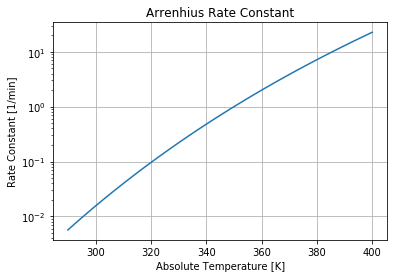

In [6]:
plt.semilogy(T, k(T))
plt.xlabel('Absolute Temperature [K]')
plt.ylabel('Rate Constant [1/min]')
plt.title('Arrenhius Rate Constant')
plt.grid(); # hold grid

### Model Equations and Parameter values

#### Transient Behavior
#### asssumes a cooling water temp 300 K

In [12]:
# import library
from scipy.integrate import solve_ivp

# parameter
Ea = 72750.0 # J/gmol #activation function
k0 = 7.2e10 # 1/min # gas constant
R = 8.314 # J/gmol/K # Arrhenius rate constant 1/m
V = 100.0 # liters # Volume
rho = 1000.0 # g/litter # density
Cp = 0.239 # J/g/K # Heat capacity
dH = -5.0e4 # J/gmol #Enthalpy of reaction
UA = 5.0e4 # J/min/K # Heat transfer
q = 100.0 # liter # Flowrate
cAi = 1.0 # gmol/liter # 
Ti = 350.0 # K
cA0 = 0.5 # gmol/liter
T0 = 350.0 # K
Tc = 300.0 # K

In [15]:
# derivative equation
def deriv(t, y):
    cA, T = y
    dcAdt = (q/V)*(cAi-cA)-k(T)*cA
    dTdt = (q/V)*(Ti-T)+(-dH*k(T)*cA/(rho*Cp))+UA/(V*rho*Cp)*(Tc-T)
    return [dcAdt, dTdt]

In [16]:
#simulation
IC = [cA0, T0]
t_initial = 0.0
t_final = 10.0
t = np.linspace(t_initial, t_final, 2000)
soln = solve_ivp(deriv, [t_initial, t_final], IC, t_eval=t)

In [21]:
#visualization plots concentration and temperature on given axes
def plot_Exothermic_reactor(ax, t, y):
    # Concentration graph
    ax[0].plot(t, y[0], label=str(Tc))
    ax[0].set_xlabel('Time [min]')
    ax[0].set_ylabel('Concentration [gmol/liter]')
    ax[0].set_title('Concentration')
    ax[0].set_ylim(0, 1) # range
    ax[0].legend()
    # Temp graph
    ax[1].plot(t, y[1], label=str(Tc))
    ax[1].set_xlabel('Time [min]')
    ax[1].set_ylabel('Temperature [K]');
    ax[1].set_title('Temperature')
    ax[1].set_ylim(300, 450)
    ax[1].legend()

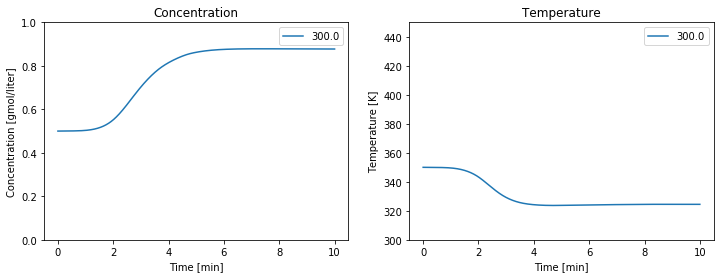

In [22]:
# main run program
fig, ax = plt.subplots(1, 2, figsize=(12,4))
plot_Exothermic_reactor(ax, soln.t, soln.y)

#### Effect of cooling Temperature

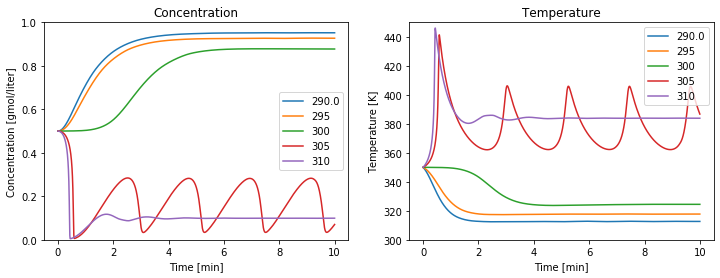

In [38]:
# Try to change temp +5 , -5
fig, ax = plt.subplots(1, 2, figsize=(12, 4))
for Tc in [290.0, 295, 300, 305, 310]:
    soln = solve_ivp(deriv, [t_initial, t_final], IC, t_eval=t)
    plot_Exothermic_reactor(ax, soln.t, soln.y)

#### Interactive Simulation

In [28]:
# Observe Rubaway, sustained, osciallations, and low and high conversion steady states
# import library 
from ipywidgets import interact
from IPython.display import display
from scipy.integrate import solve_ivp

In [31]:
# create an initial plot object, and close so it doesn't appear
Tc = 300.0
fig, ax = plt.subplots(1, 2, figsize=(12, 4))
soln = solve_ivp(deriv, [t_initial, t_final], IC, t_eval=t)
plot_reactor(ax, soln.t, soln.y)
plt.close()

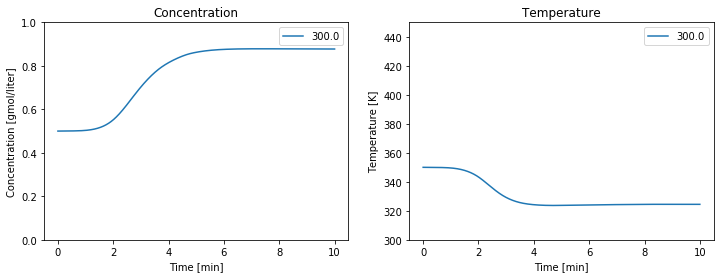

<function __main__.sim(Tcooling)>

In [37]:
# function to update and display the plot object
def sim(Tcooling):
    global Tc
    Tc = Tcooling
    soln = solve_ivp(deriv, [t_initial, t_final], IC, t_eval=t)
    ax[0].lines[0].set_ydata(soln.y[0])  # line plot
    ax[0].legend().get_texts()[0].set_text(str(Tc))
    ax[1].lines[0].set_ydata(soln.y[1])
    ax[1].legend().get_texts()[0].set_text(str(Tc))
    display(fig)
    
# interactive widget
interact(sim, Tcooling =(290.0, 310.0), continuous_update=False)

## Nullclines

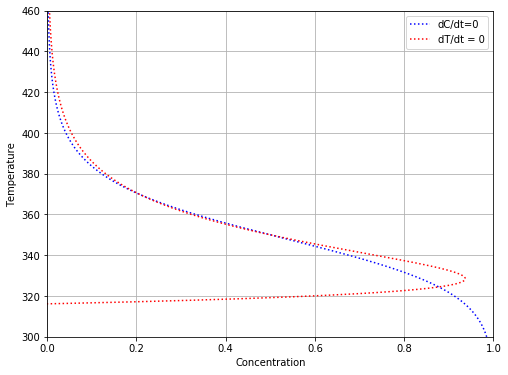

In [42]:
# plot nullclines
def plot_nullclines(ax):
    T = np.linspace(300.0, 460.0, 1000)
    ax.plot((q/V)*cAi/((q/V)+k(T)), T, 'b:')
    ax.plot(((q/V)*(Ti-T)+(UA/V/rho/Cp)*(Tc-T))/((dH/rho/Cp)*k(T)), T, 'r:')
    ax.set_xlim(0,1)
    ax.set_ylim(300, 460)
    ax.grid()
    ax.legend(['dC/dt=0','dT/dt = 0'])
    ax.set_xlabel('Concentration')
    ax.set_ylabel('Temperature')
    
fix, ax = plt.subplots(1, 1,figsize=(8,6))
plot_nullclines(ax)

## Phase Plane Analysis

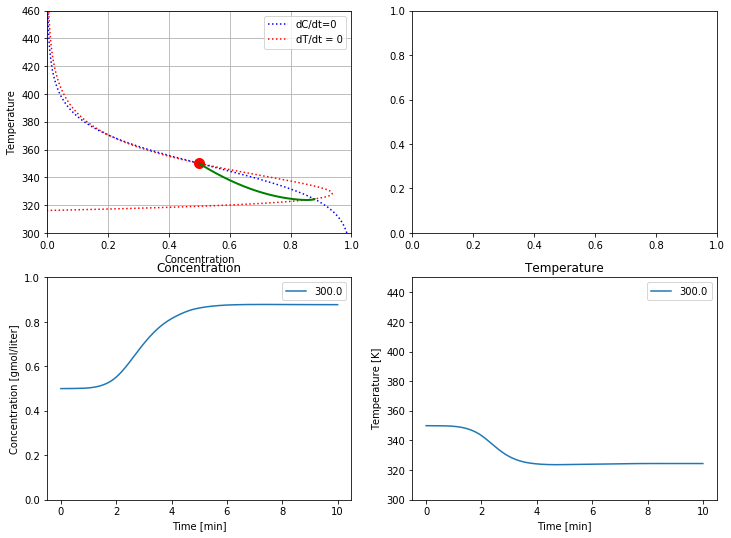

<function __main__.phase(cinitial=0.5, Tinitial=350)>

In [44]:
# All graph
def plot_phase(ax, t, y):
    ax.plot(y[0][0], y[1][0], 'r.', ms=20)
    ax.plot(y[0], y[1], 'g', lw=2)
    
def phase(cinitial=0.5, Tinitial=350):
    global Tc
    soln = solve_ivp(deriv, [t_initial, t_final], [cinitial, Tinitial], t_eval=t)
    
    ax[0, 0].lines[2].set_xdata(soln.y[0][0])
    ax[0, 0].lines[2].set_ydata(soln.y[1][0])
    ax[0, 0].lines[3].set_xdata(soln.y[0])
    ax[0, 0].lines[3].set_ydata(soln.y[1])
    ax[1, 0].lines[0].set_ydata(soln.y[0])
    ax[1, 1].lines[0].set_ydata(soln.y[1])
    display(fig)
    
Tc = 300.0
cinitial = 0.5
Tinitial = 350.0
fig, ax = plt.subplots(2, 2, figsize=(12, 9))
soln = solve_ivp(deriv, [t_initial, t_final], [cinitial, Tinitial], t_eval=t)
plot_nullclines(ax[0, 0])
plot_phase(ax[0, 0], soln.t, soln.y)
plot_Exothermic_reactor(ax[1,:], soln.t, soln.y)
plt.close()

interact(phase, cinitial=(0, 1, 0.01), Tinitial=(300,400,1))